In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix 
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/yiweihan/Desktop/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

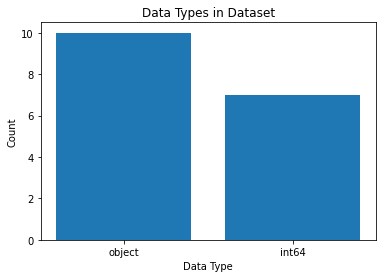

In [4]:
dtypes = df.dtypes.value_counts()

# Create a bar plot of the datatypes
plt.bar(dtypes.index.astype(str), dtypes.values)
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.title("Data Types in Dataset")
plt.show()

# Pre Processig

## Unknown Data

In [5]:
df.drop(df[df['job'] == 'unknown' ].index , inplace=True)
df.drop(df[df['education'] == 'unknown' ].index , inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [6]:
df.shape

(43193, 17)

## Numerical Data

In [7]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['balance'] < (Q1 - 1.5 * IQR)) | (df['balance'] > (Q3 + 1.5 * IQR)))]

In [8]:
df.shape

(38648, 17)

In [9]:
cols=["age","duration","campaign","pdays","previous","balance"]

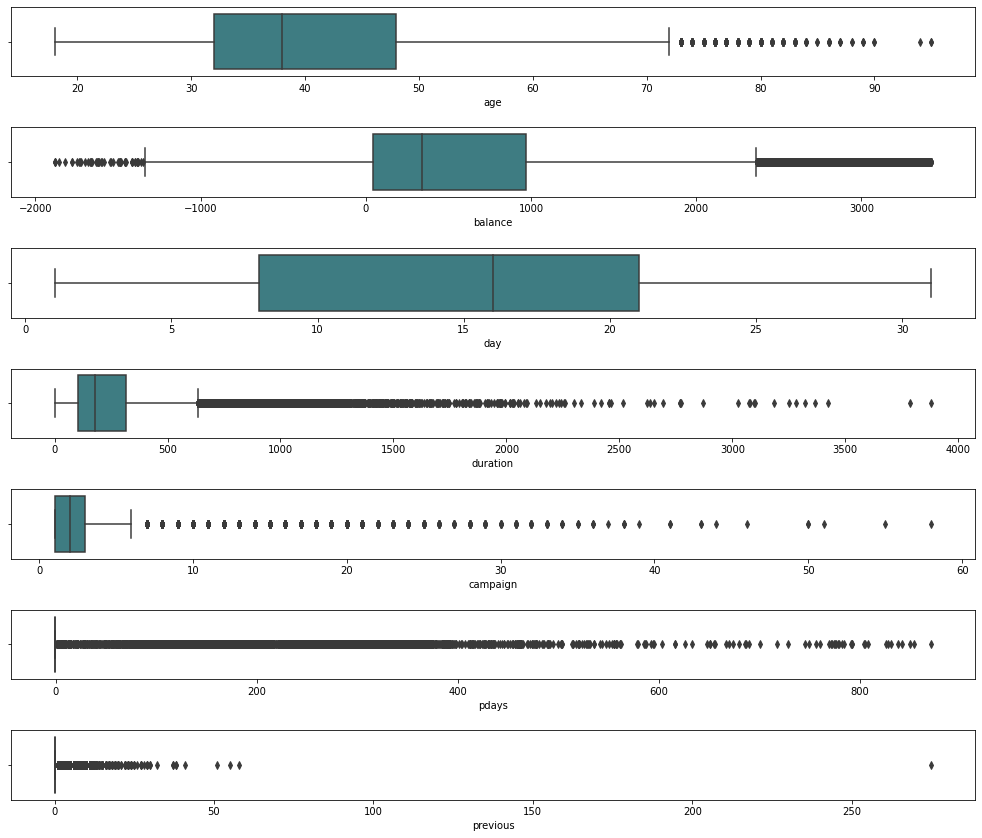

In [10]:
ot=df.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['balance'] = scaler.fit_transform(df[['balance']])
df['duration'] = scaler.fit_transform(df[['duration']])
df['campaign'] = scaler.fit_transform(df[['campaign']])
df['pdays'] = scaler.fit_transform(df[['pdays']])
df['previous'] = scaler.fit_transform(df[['previous']])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,tertiary,no,0.758809,yes,no,unknown,5,may,0.067251,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.360467,yes,no,unknown,5,may,0.038907,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.355380,yes,yes,unknown,5,may,0.019583,0.0,0.0,0.0,unknown,no
5,0.220779,management,married,tertiary,no,0.398530,yes,no,unknown,5,may,0.035816,0.0,0.0,0.0,unknown,no
6,0.129870,management,single,tertiary,no,0.439231,yes,yes,unknown,5,may,0.055913,0.0,0.0,0.0,unknown,no


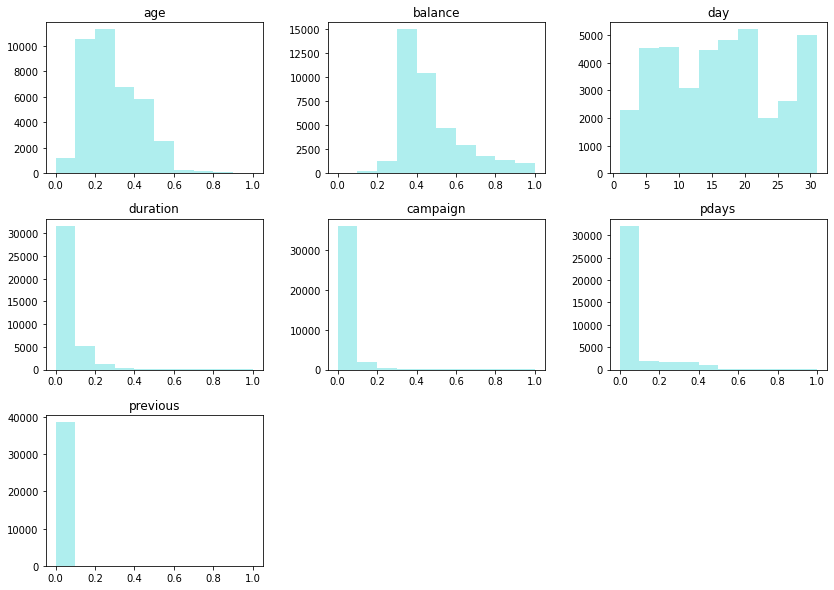

In [12]:
df.hist(figsize=(14,10),color="paleturquoise",grid=False)
plt.show()

## Binary Data

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['housing'] = lb.fit_transform(df['housing'])
df['loan'] = lb.fit_transform(df['loan'])
df['default'] = lb.fit_transform(df['default'])
df['Target'] = lb.fit_transform(df['Target'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,tertiary,0,0.758809,1,0,unknown,5,may,0.067251,0.0,0.0,0.0,unknown,0
1,0.337662,technician,single,secondary,0,0.360467,1,0,unknown,5,may,0.038907,0.0,0.0,0.0,unknown,0
2,0.194805,entrepreneur,married,secondary,0,0.355380,1,1,unknown,5,may,0.019583,0.0,0.0,0.0,unknown,0
5,0.220779,management,married,tertiary,0,0.398530,1,0,unknown,5,may,0.035816,0.0,0.0,0.0,unknown,0
6,0.129870,management,single,tertiary,0,0.439231,1,1,unknown,5,may,0.055913,0.0,0.0,0.0,unknown,0


## Ordinal Data

In [14]:
df['education'] = np.where(df['education'] == 'primary', 1, 
                 np.where(df['education'] == 'secondary', 2,
                 np.where(df['education'] == 'tertiary', 3, 0)))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,3,0,0.758809,1,0,unknown,5,may,0.067251,0.0,0.0,0.0,unknown,0
1,0.337662,technician,single,2,0,0.360467,1,0,unknown,5,may,0.038907,0.0,0.0,0.0,unknown,0
2,0.194805,entrepreneur,married,2,0,0.355380,1,1,unknown,5,may,0.019583,0.0,0.0,0.0,unknown,0
5,0.220779,management,married,3,0,0.398530,1,0,unknown,5,may,0.035816,0.0,0.0,0.0,unknown,0
6,0.129870,management,single,3,0,0.439231,1,1,unknown,5,may,0.055913,0.0,0.0,0.0,unknown,0


In [15]:
df['month'] = np.where(df['month'] == 'jan', 1, 
                 np.where(df['month'] == 'feb', 2,
                 np.where(df['month'] == 'mar', 3, 
                 np.where(df['month'] == 'apr', 4,
                 np.where(df['month'] == 'may', 5,
                 np.where(df['month'] == 'jun', 6,
                 np.where(df['month'] == 'jul', 7,
                 np.where(df['month'] == 'aug', 8,
                 np.where(df['month'] == 'sep', 9,
                 np.where(df['month'] == 'oct', 10,
                 np.where(df['month'] == 'nov', 11,12)))))))))))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,3,0,0.758809,1,0,unknown,5,5,0.067251,0.0,0.0,0.0,unknown,0
1,0.337662,technician,single,2,0,0.360467,1,0,unknown,5,5,0.038907,0.0,0.0,0.0,unknown,0
2,0.194805,entrepreneur,married,2,0,0.355380,1,1,unknown,5,5,0.019583,0.0,0.0,0.0,unknown,0
5,0.220779,management,married,3,0,0.398530,1,0,unknown,5,5,0.035816,0.0,0.0,0.0,unknown,0
6,0.129870,management,single,3,0,0.439231,1,1,unknown,5,5,0.055913,0.0,0.0,0.0,unknown,0


## Categorical Data

In [16]:
one_hot = pd.get_dummies(df['marital'])
df = df.drop('marital', axis=1)
df = df.join(one_hot)
df.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,divorced,married,single
0,0.519481,management,3,0,0.758809,1,0,unknown,5,5,0.067251,0.0,0.0,0.0,unknown,0,False,True,False
1,0.337662,technician,2,0,0.360467,1,0,unknown,5,5,0.038907,0.0,0.0,0.0,unknown,0,False,False,True
2,0.194805,entrepreneur,2,0,0.355380,1,1,unknown,5,5,0.019583,0.0,0.0,0.0,unknown,0,False,True,False
5,0.220779,management,3,0,0.398530,1,0,unknown,5,5,0.035816,0.0,0.0,0.0,unknown,0,False,True,False
6,0.129870,management,3,0,0.439231,1,1,unknown,5,5,0.055913,0.0,0.0,0.0,unknown,0,False,False,True


In [17]:
one_hot = pd.get_dummies(df['job'])
df = df.drop('job', axis=1)
df = df.join(one_hot)
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0.519481,3,0,0.758809,1,0,unknown,5,5,0.067251,...,False,False,False,True,False,False,False,False,False,False
1,0.337662,2,0,0.360467,1,0,unknown,5,5,0.038907,...,False,False,False,False,False,False,False,False,True,False
2,0.194805,2,0,0.355380,1,1,unknown,5,5,0.019583,...,False,True,False,False,False,False,False,False,False,False
5,0.220779,3,0,0.398530,1,0,unknown,5,5,0.035816,...,False,False,False,True,False,False,False,False,False,False
6,0.129870,3,0,0.439231,1,1,unknown,5,5,0.055913,...,False,False,False,True,False,False,False,False,False,False


In [18]:
one_hot = pd.get_dummies(df['contact'])
df = df.drop('contact', axis=1)
df = df.join(one_hot)
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,unknown
0,0.519481,3,0,0.758809,1,0,5,5,0.067251,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0.337662,2,0,0.360467,1,0,5,5,0.038907,0.0,...,False,False,False,False,False,True,False,False,False,True
2,0.194805,2,0,0.355380,1,1,5,5,0.019583,0.0,...,False,False,False,False,False,False,False,False,False,True
5,0.220779,3,0,0.398530,1,0,5,5,0.035816,0.0,...,True,False,False,False,False,False,False,False,False,True
6,0.129870,3,0,0.439231,1,1,5,5,0.055913,0.0,...,True,False,False,False,False,False,False,False,False,True


In [19]:
df = df.drop('poutcome', axis=1)
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,unknown
0,0.519481,3,0,0.758809,1,0,5,5,0.067251,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0.337662,2,0,0.360467,1,0,5,5,0.038907,0.0,...,False,False,False,False,False,True,False,False,False,True
2,0.194805,2,0,0.355380,1,1,5,5,0.019583,0.0,...,False,False,False,False,False,False,False,False,False,True
5,0.220779,3,0,0.398530,1,0,5,5,0.035816,0.0,...,True,False,False,False,False,False,False,False,False,True
6,0.129870,3,0,0.439231,1,1,5,5,0.055913,0.0,...,True,False,False,False,False,False,False,False,False,True


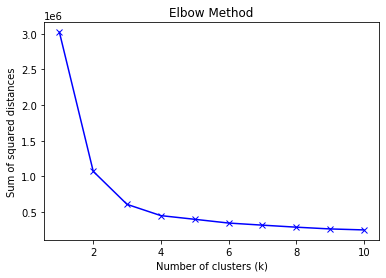

In [20]:
from sklearn.cluster import KMeans
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 11), ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()


# Modeling

## Model Preparation

### Train Test Split

In [21]:
X=df.drop('Target',axis=1)
y=df['Target']  
from collections import Counter
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 24072, 1: 2981})


### SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print('Resample dataset shape %s' % Counter(y_train))

Resample dataset shape Counter({0: 24072, 1: 24072})


## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8630


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X, y, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8148771  0.68214748 0.62949547 0.51403804 0.24556864]


In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80579499 0.91857929 0.91639838 0.91317894 0.9221022 ]


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8771022  0.8792583  0.88184562 0.87365244 0.87235878]


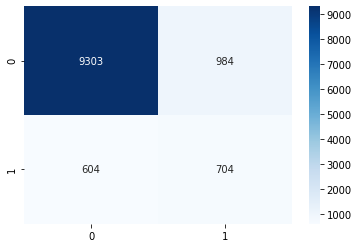

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.0f', cmap = 'Blues');

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10287
           1       0.42      0.54      0.47      1308

    accuracy                           0.86     11595
   macro avg       0.68      0.72      0.70     11595
weighted avg       0.88      0.86      0.87     11595



In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision: {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('F1 score: {0:0.4f}'.format(f1))

Precision: 0.4171
Recall: 0.5382
F1 score: 0.4700


## XG Boost

In [30]:
import xgboost as xgb
model2 = xgb.XGBClassifier(random_state = 455)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9053


In [31]:
scores = cross_val_score(model2, X, y, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.89029754 0.70750323 0.72496766 0.47160047 0.32371588]


In [32]:
scores = cross_val_score(model2, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.72364732 0.96728632 0.96572853 0.96323606 0.96780224]


In [33]:
scores = cross_val_score(model2, X_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.89995688 0.90513152 0.90168176 0.90901251 0.91030617]


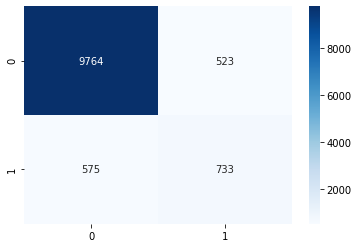

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.0f', cmap = 'Blues');

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10287
           1       0.58      0.56      0.57      1308

    accuracy                           0.91     11595
   macro avg       0.76      0.75      0.76     11595
weighted avg       0.90      0.91      0.90     11595



In [36]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision: {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('F1 score: {0:0.4f}'.format(f1))

Precision: 0.5836
Recall: 0.5604
F1 score: 0.5718


## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8633


In [38]:
scores = cross_val_score(model4, X, y, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.89896507 0.90582147 0.88408797 0.83024971 0.87048777]


In [39]:
scores = cross_val_score(model4, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79696749 0.89666632 0.90040503 0.89469311 0.90029082]


In [40]:
scores = cross_val_score(model4, X_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.90168176 0.89650712 0.89435101 0.898232   0.89607589]


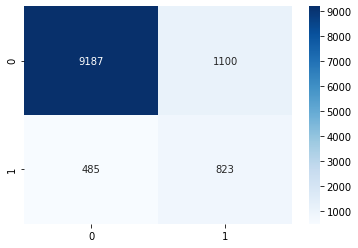

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='0.0f', cmap = 'Blues');

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     10287
           1       0.43      0.63      0.51      1308

    accuracy                           0.86     11595
   macro avg       0.69      0.76      0.72     11595
weighted avg       0.89      0.86      0.87     11595



In [43]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision: {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('F1 score: {0:0.4f}'.format(f1))

Precision: 0.4280
Recall: 0.6292
F1 score: 0.5094


## Voting Classifier

In [44]:
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.ensemble import  GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = KNeighborsClassifier()
model_4 = DecisionTreeClassifier()
model_5 = SVC(probability=True)
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('knn', model_3), ('dt', model_4), ('svm', model_5)],voting='soft')
final_model.fit(X_train, y_train)
pred_final = final_model.predict(X_test)
 
score = accuracy_score(y_test, pred_final)

In [55]:
score

0.8947822337214316

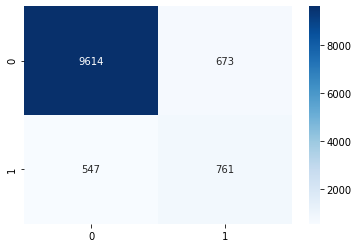

In [56]:
sns.heatmap(confusion_matrix(y_test, pred_final), annot=True, fmt='0.0f', cmap = 'Blues');

In [57]:
precision = precision_score(y_test, pred_final)
recall = recall_score(y_test, pred_final)
f1 = f1_score(y_test, pred_final)

print('Precision: {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('F1 score: {0:0.4f}'.format(f1))

Precision: 0.5307
Recall: 0.5818
F1 score: 0.5551


## ROC Curve

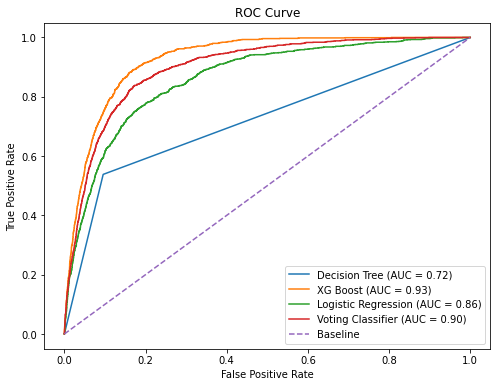

In [58]:
models = [model1, model2, model4,final_model]
model_names = ['Decision Tree', 'XG Boost', 'Logistic Regression','Voting Classifier']

plt.figure(figsize=(8,6))
for i in range(len(models)):
    if i != 4:
        pred_prob = models[i].predict_proba(X_test)[:,1]
    else:
        pred_prob = models[i].predict_proba(X_test)
        pred_prob = pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    auc_score = roc_auc_score(y_test, pred_prob)
    plt.plot(fpr, tpr, label=model_names[i] + ' (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
